In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


import seaborn as sb


In [3]:
# Cargar datos desde el archivo CSV
ruta_csv = "/Users/david/Downloads/comprar_alquilar.csv"
datos = pd.read_csv(ruta_csv)

In [4]:
datos

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [6]:
#Identificando valores promedio
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


ingresos            4958.995050
gastos_comunes       971.584158
pago_coche           211.742574
gastos_otros         515.425743
ahorros            38749.668317
vivienda          373349.638614
estado_civil           1.024752
hijos                  1.232673
trabajo                4.490099
comprar                0.331683
dtype: float64

In [7]:
#Identificando la varianza de las variables
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


ingresos          2.832026e+06
gastos_comunes    7.404187e+04
pago_coche        1.561019e+04
gastos_otros      2.825864e+04
ahorros           3.015513e+08
vivienda          1.859719e+10
estado_civil      7.008768e-01
hijos             1.870967e+00
trabajo           6.430250e+00
comprar           2.227723e-01
dtype: float64

In [8]:
#normalizando los datos
scaler=StandardScaler()
scaler.fit(datos) # calculando la media para poder hacer la transformacion
X_scaled=scaler.transform(datos)# escalando los datos y normalizandolos

In [9]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA. Reducción de Dimensionalidad

In [10]:
# Proyección de las observaciones de entrenamiento
X_pca = pd.DataFrame(
    X_pca,
    columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'],
    index   = datos.index
)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.535449,0.068159,-0.545565,-2.179020,-0.355643,-0.348843,-0.510708,-0.878541,0.272100
1,-1.282144,0.823909,1.233645,0.081871,1.201388,0.835942,-1.234253,-0.097668,0.798401
2,-0.779890,2.176401,0.438365,-1.265585,-1.003528,-0.270164,1.420402,0.876554,-0.238486
3,-3.150472,-1.288086,-0.290494,-0.190528,1.351337,1.281028,-0.841160,0.572358,0.269428
4,-0.940483,-0.672760,-0.925130,-0.603372,-0.491272,-1.490638,0.156435,0.067180,0.611393


In [11]:
print("Porcentaje de varianza por componente", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:2]))

Porcentaje de varianza por componente (202, 9)
[0.27368381 0.23958688 0.10991099 0.10411098 0.09105662 0.07352523
 0.0457761  0.02745036 0.02469122]
suma: 0.5132706915557043


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.27368381 0.51327069 0.62318168 0.72729266 0.81834928 0.8918745
 0.9376506  0.96510097 0.98979219]


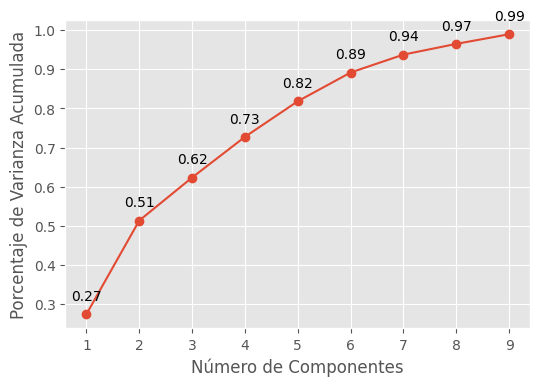

In [43]:
# Graficamos el acumulado de varianza explicada en las nuevas dimensiones
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(1, len(X_pca.columns) + 1), prop_varianza_acum, marker='o')

for x, y in zip(np.arange(1, len(X_pca.columns) + 1), prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

ax.set_xlabel('Número de Componentes')
ax.set_ylabel('Porcentaje de Varianza Acumulada')
plt.show()

In [44]:
# Reducción de componentes
num_componentes_reducidos = 2  # Número de componentes que deseas utilizar
X_pca_reducido = X_pca.iloc[:, :num_componentes_reducidos]

In [45]:
# Imprimir la nueva forma de los datos después de la reducción
print("Nueva forma de los datos después de la reducción de componentes:", X_pca_reducido.shape)

Nueva forma de los datos después de la reducción de componentes: (202, 2)


In [46]:
Y = datos.index
Y = pd.DataFrame(Y,columns= ['Estados'])

In [47]:
X = X_pca[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']]
X = X.reset_index()

In [48]:
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.535449,0.068159,-0.545565,-2.179020,-0.355643,-0.348843,-0.510708,-0.878541,0.272100
1,-1.282144,0.823909,1.233645,0.081871,1.201388,0.835942,-1.234253,-0.097668,0.798401
2,-0.779890,2.176401,0.438365,-1.265585,-1.003528,-0.270164,1.420402,0.876554,-0.238486
3,-3.150472,-1.288086,-0.290494,-0.190528,1.351337,1.281028,-0.841160,0.572358,0.269428
4,-0.940483,-0.672760,-0.925130,-0.603372,-0.491272,-1.490638,0.156435,0.067180,0.611393
...,...,...,...,...,...,...,...,...,...
197,1.368384,-2.318268,-0.143904,0.556349,-0.013747,-0.706695,-0.366681,-0.088715,1.003391
198,1.801838,1.493531,0.138886,0.942028,0.044331,0.935169,-0.451565,0.127983,-0.122394
199,1.384663,0.913366,1.336874,0.069829,-0.464953,0.221497,-1.091991,0.492400,-0.319524
200,1.718134,-0.303022,0.976079,0.691466,-0.609778,-0.092613,-0.490341,-0.125499,0.376254


In [49]:
# Asegurarse de que ambas listas tengan la misma longitud
num_componentes = 9  # Cambiar según la cantidad de componentes que estás utilizando
nombres_componentes = [f'PC{i}' for i in range(1, num_componentes + 1)]

In [50]:
# Crear DataFrame con las listas ajustadas
df = pd.DataFrame({'var': pca.explained_variance_ratio_, 'PC': nombres_componentes})

In [51]:
# Imprimir el DataFrame
print(df)

        var   PC
0  0.273684  PC1
1  0.239587  PC2
2  0.109911  PC3
3  0.104111  PC4
4  0.091057  PC5
5  0.073525  PC6
6  0.045776  PC7
7  0.027450  PC8
8  0.024691  PC9


In [52]:
df=pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']})
print(df), 

        var   PC
0  0.273684  PC1
1  0.239587  PC2
2  0.109911  PC3
3  0.104111  PC4
4  0.091057  PC5
5  0.073525  PC6
6  0.045776  PC7
7  0.027450  PC8
8  0.024691  PC9


(None,)

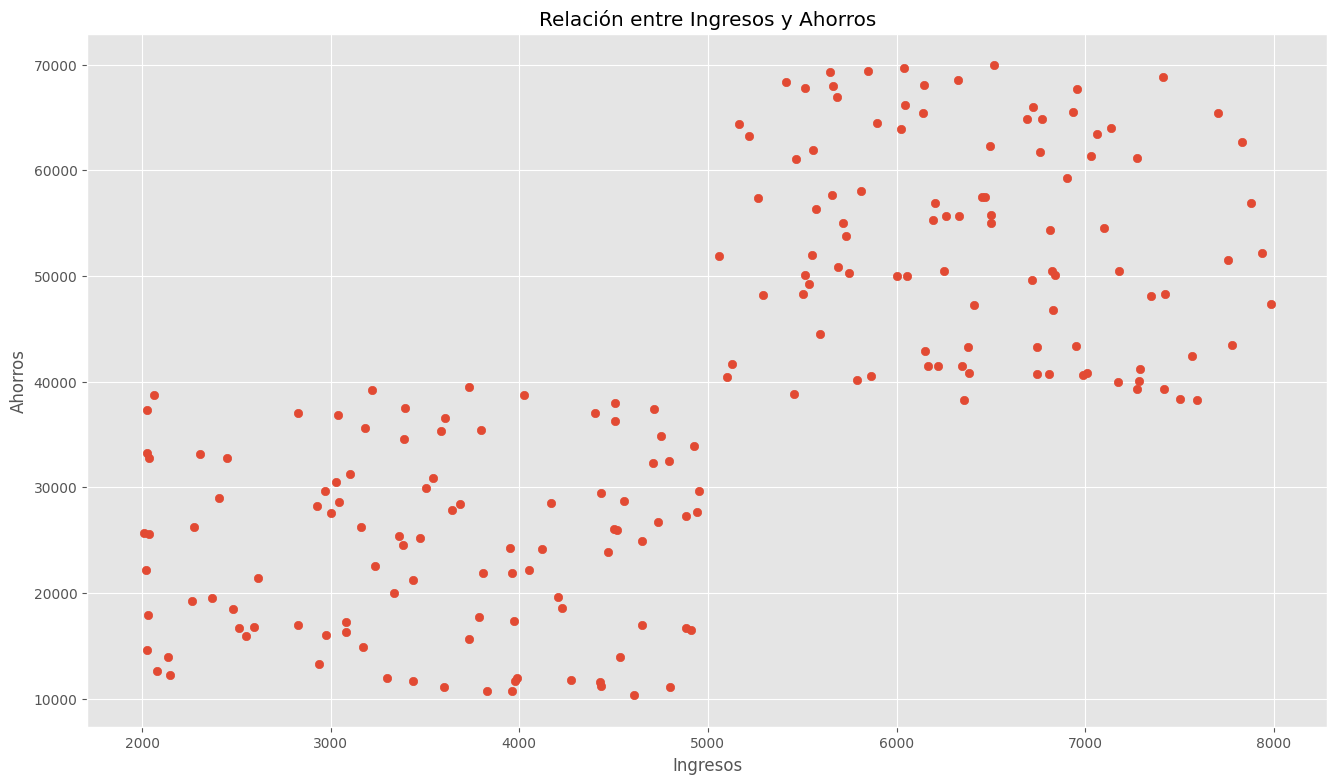

In [53]:
plt.scatter(datos['ingresos'], datos['ahorros'])
plt.xlabel('Ingresos')
plt.ylabel('Ahorros')
plt.title('Relación entre Ingresos y Ahorros')
plt.show()

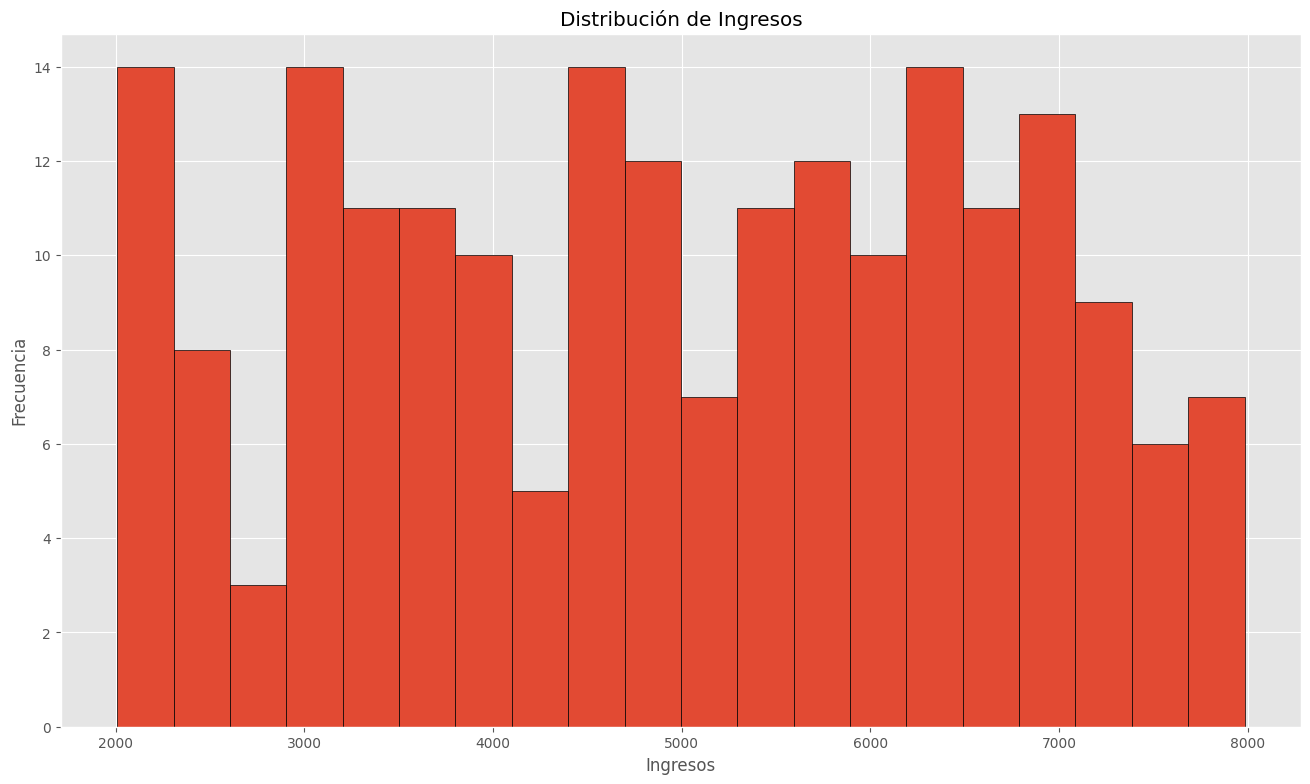

In [54]:
plt.hist(datos['ingresos'], bins=20, edgecolor='black')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos')
plt.show()

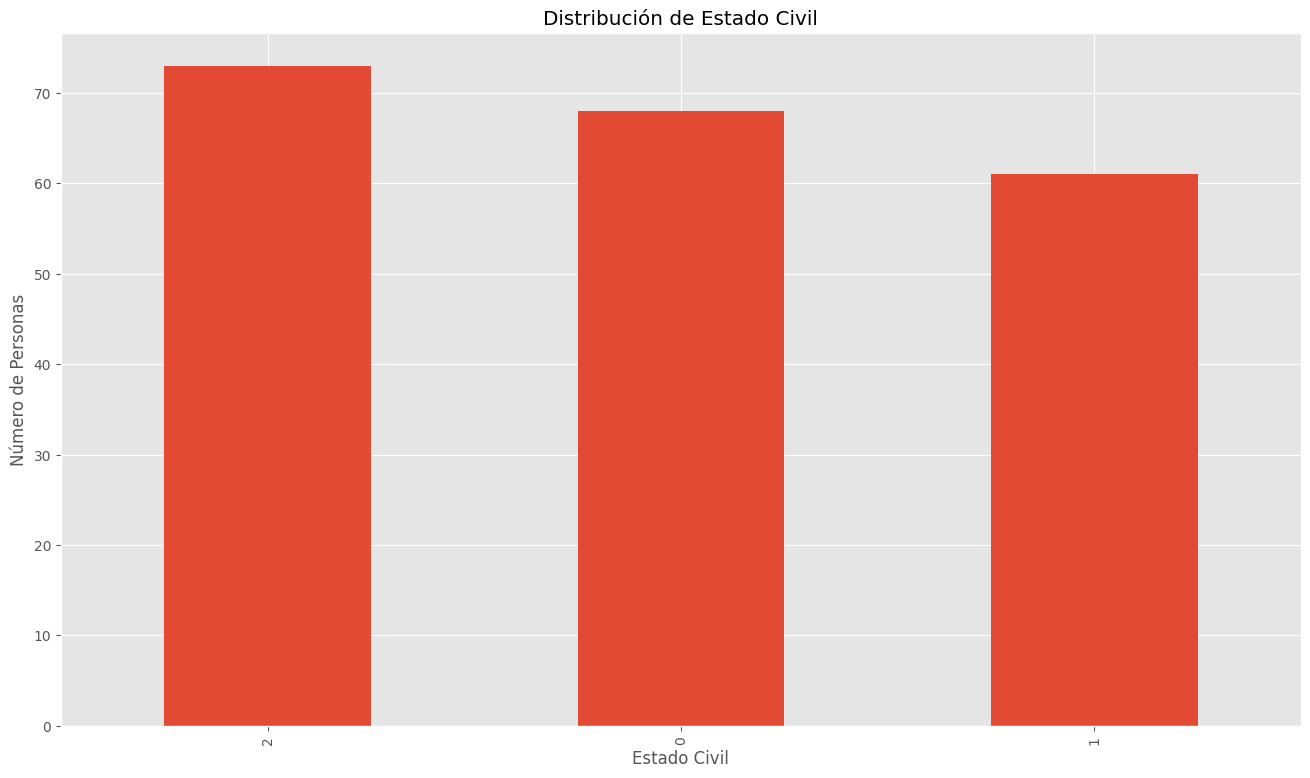

In [55]:
estado_civil_counts = datos['estado_civil'].value_counts()
estado_civil_counts.plot(kind='bar')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Personas')
plt.title('Distribución de Estado Civil')
plt.show()

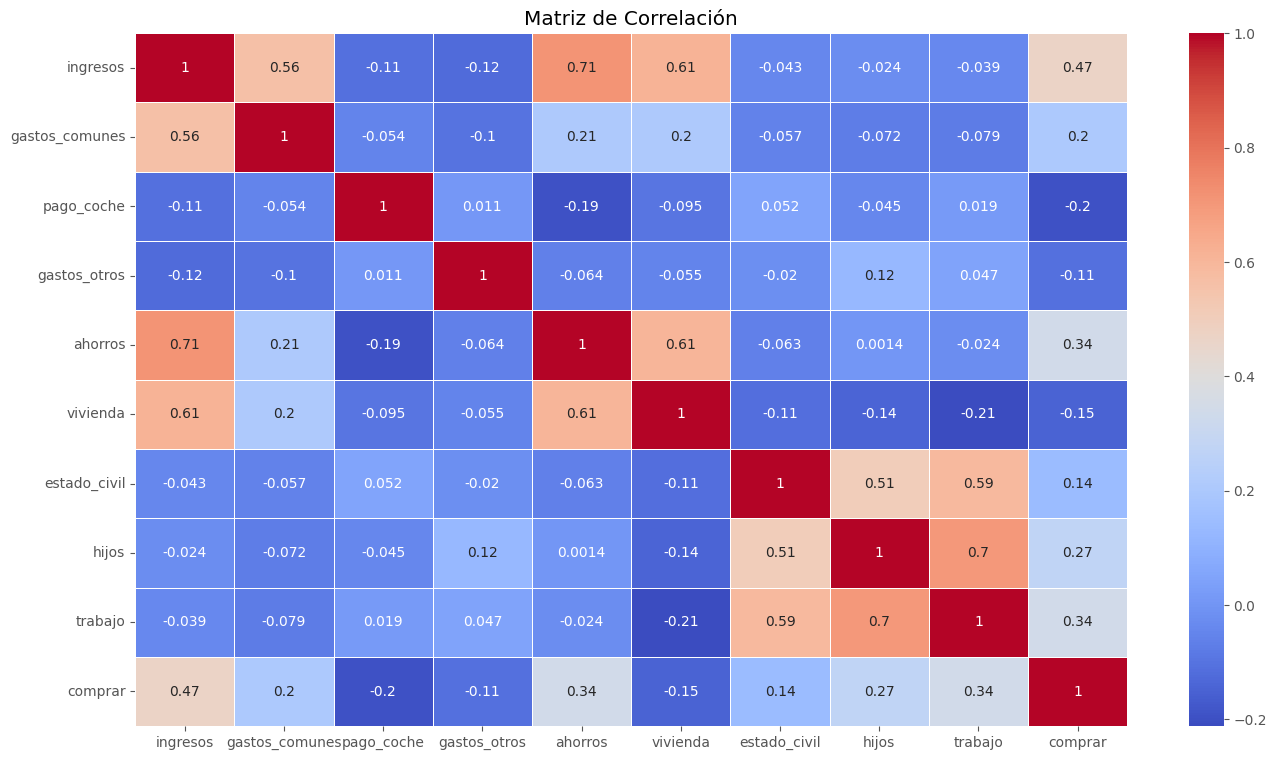

In [56]:
correlation_matrix = datos.corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()